#### Author: Chong Xiao Ying
##### Tutorial Group: GP05

In [ ]:
# Import necessary libraries, packages and modules
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Keras imports 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, MaxPooling2D, 
                                     Flatten, Dense, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img

In [ ]:
from keras.datasets import cifar10

### Understanding the dataset

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [ ]:
# summarize loaded dataset
# We have 50000 images for training, each image is (32,32,3)
# We have 10000 images for testing, each image is (32,32,3)
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape)) 
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


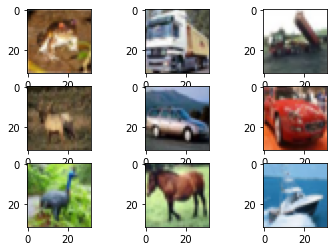

In [ ]:
# Visualizing the dataset by plotting the first few images
for i in range(9):
	# define subplot
	matplotlib.pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	matplotlib.pyplot.imshow(trainX[i])

### Loading the dataset

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
    # transform integer into a 10 element binary vector with a 1 for the index of the class value
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert the pixel values from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize the pixel values to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

### Build Model

In [ ]:
def build_model():
    
    inp = Input(shape=(32, 32, 3))

    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(inp)
    x = BatchNormalization()(x)
    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.20)(x)

    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.20)(x)

    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.20)(x)

    x = Flatten()(x)
    x = Dropout(0.20)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.20)(x)

    out = Dense(10, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)

    opt = Adam(learning_rate=0.0003)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_cnn = build_model()
print(model_cnn.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

2021-11-10 21:54:29.987150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 21:54:29.991489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 21:54:29.991893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 21:54:29.992516: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model_cnn = build_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)

In [ ]:
print(trainX.shape[0])
print(testX.shape[0])

50000
10000


In [ ]:
# define training and test step size
train_steps = trainX.shape[0] // 64
test_steps = testX.shape[0] // 64

print("Train Step Size = " + str(train_steps) + ", Testing Step Size = " + str(test_steps))

Train Step Size = 781, Testing Step Size = 156


In [ ]:
history = model_cnn.fit(it_train, 
                        steps_per_epoch = train_steps, 
                        epochs=250, 
                        validation_data=(testX, testY), 
                        verbose=1)

Epoch 1/250


2021-11-10 21:54:31.031038: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-10 21:54:32.033675: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204


781/781 [==============================] - 14s 15ms/step - loss: 1.7251 - accuracy: 0.3817 - val_loss: 1.4176 - val_accuracy: 0.4977
Epoch 2/250
781/781 [==============================] - 11s 14ms/step - loss: 1.3854 - accuracy: 0.5041 - val_loss: 1.1530 - val_accuracy: 0.5818
Epoch 3/250
781/781 [==============================] - 11s 14ms/step - loss: 1.2490 - accuracy: 0.5565 - val_loss: 1.1372 - val_accuracy: 0.6008
Epoch 4/250
781/781 [==============================] - 11s 14ms/step - loss: 1.1675 - accuracy: 0.5902 - val_loss: 0.9865 - val_accuracy: 0.6504
Epoch 5/250
781/781 [==============================] - 11s 14ms/step - loss: 1.0989 - accuracy: 0.6150 - val_loss: 0.9694 - val_accuracy: 0.6649
Epoch 6/250
781/781 [==============================] - 11s 14ms/step - loss: 1.0456 - accuracy: 0.6325 - val_loss: 0.9461 - val_accuracy: 0.6813
Epoch 7/250
781/781 [==============================] - 11s 14ms/step - loss: 1.0073 - accuracy: 0.6471 - val_loss: 0.8744 - val_accuracy: 0.69

781/781 [==============================] - 11s 14ms/step - loss: 0.5772 - accuracy: 0.7989 - val_loss: 0.5407 - val_accuracy: 0.8176
Epoch 58/250
781/781 [==============================] - 11s 14ms/step - loss: 0.5699 - accuracy: 0.8024 - val_loss: 0.6039 - val_accuracy: 0.7982
Epoch 59/250
781/781 [==============================] - 11s 14ms/step - loss: 0.5739 - accuracy: 0.8021 - val_loss: 0.5287 - val_accuracy: 0.8205
Epoch 60/250
781/781 [==============================] - 11s 14ms/step - loss: 0.5656 - accuracy: 0.8038 - val_loss: 0.5207 - val_accuracy: 0.8207
Epoch 61/250
781/781 [==============================] - 11s 14ms/step - loss: 0.5700 - accuracy: 0.8033 - val_loss: 0.5531 - val_accuracy: 0.8159
Epoch 62/250
781/781 [==============================] - 11s 14ms/step - loss: 0.5587 - accuracy: 0.8080 - val_loss: 0.5403 - val_accuracy: 0.8172
Epoch 63/250
781/781 [==============================] - 11s 14ms/step - loss: 0.5643 - accuracy: 0.8057 - val_loss: 0.5310 - val_accuracy

781/781 [==============================] - 11s 14ms/step - loss: 0.4860 - accuracy: 0.8309 - val_loss: 0.4709 - val_accuracy: 0.8388
Epoch 114/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4814 - accuracy: 0.8339 - val_loss: 0.4675 - val_accuracy: 0.8399
Epoch 115/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4815 - accuracy: 0.8332 - val_loss: 0.4763 - val_accuracy: 0.8333
Epoch 116/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4795 - accuracy: 0.8325 - val_loss: 0.5115 - val_accuracy: 0.8256
Epoch 117/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4760 - accuracy: 0.8342 - val_loss: 0.4736 - val_accuracy: 0.8392
Epoch 118/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4785 - accuracy: 0.8347 - val_loss: 0.4739 - val_accuracy: 0.8388
Epoch 119/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4745 - accuracy: 0.8349 - val_loss: 0.4715 - val_ac

Epoch 169/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4350 - accuracy: 0.8484 - val_loss: 0.4682 - val_accuracy: 0.8417
Epoch 170/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4340 - accuracy: 0.8465 - val_loss: 0.4560 - val_accuracy: 0.8469
Epoch 171/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4360 - accuracy: 0.8482 - val_loss: 0.4571 - val_accuracy: 0.8457
Epoch 172/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4271 - accuracy: 0.8500 - val_loss: 0.4522 - val_accuracy: 0.8467
Epoch 173/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4331 - accuracy: 0.8499 - val_loss: 0.4540 - val_accuracy: 0.8462
Epoch 174/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4296 - accuracy: 0.8502 - val_loss: 0.4486 - val_accuracy: 0.8504
Epoch 175/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4320 - accuracy: 0.8501 - val_loss: 0

Epoch 225/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4005 - accuracy: 0.8608 - val_loss: 0.4145 - val_accuracy: 0.8578
Epoch 226/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4043 - accuracy: 0.8595 - val_loss: 0.4395 - val_accuracy: 0.8555
Epoch 227/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4018 - accuracy: 0.8592 - val_loss: 0.4393 - val_accuracy: 0.8499
Epoch 228/250
781/781 [==============================] - 11s 14ms/step - loss: 0.4042 - accuracy: 0.8597 - val_loss: 0.4322 - val_accuracy: 0.8567
Epoch 229/250
781/781 [==============================] - 11s 14ms/step - loss: 0.3980 - accuracy: 0.8611 - val_loss: 0.4299 - val_accuracy: 0.8522
Epoch 230/250
781/781 [==============================] - 11s 14ms/step - loss: 0.3983 - accuracy: 0.8615 - val_loss: 0.4286 - val_accuracy: 0.8565
Epoch 231/250
781/781 [==============================] - 11s 14ms/step - loss: 0.3982 - accuracy: 0.8613 - val_loss: 0

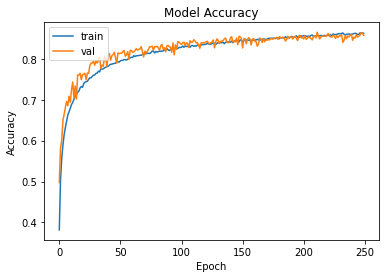

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

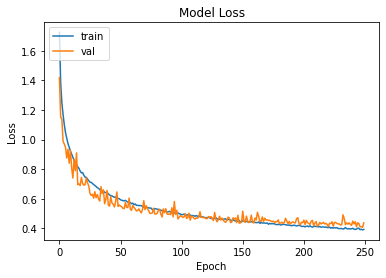

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.save('/home/yucong/Downloads/cifar10_model.h5')